In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_validate

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("nelgiriyewithana/top-spotify-songs-2023")

print("Path to dataset files:", path)

100%|██████████| 47.1k/47.1k [00:00<00:00, 44.4MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/nelgiriyewithana/top-spotify-songs-2023/versions/1


In [ ]:
files = os.listdir(path)
print("Files:", files)

Files: ['spotify-2023.csv']


In [ ]:
df = pd.read_csv(os.path.join(path, "spotify-2023.csv"), encoding='latin1')


In [ ]:
df.head(10)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
5,Sprinter,"Dave, Central Cee",2,2023,6,1,2186,91,183706234,67,...,141,C#,Major,92,66,58,19,0,8,24
6,Ella Baila Sola,"Eslabon Armado, Peso Pluma",2,2023,3,16,3090,50,725980112,34,...,148,F,Minor,67,83,76,48,0,8,3
7,Columbia,Quevedo,1,2023,7,7,714,43,58149378,25,...,100,F,Major,67,26,71,37,0,11,4
8,fukumean,Gunna,1,2023,5,15,1096,83,95217315,60,...,130,C#,Minor,85,22,62,12,0,28,9
9,La Bebe - Remix,"Peso Pluma, Yng Lvcas",2,2023,3,17,2953,44,553634067,49,...,170,D,Minor,81,56,48,21,0,8,33


In [ ]:
print(df.dtypes)

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object


In [ ]:
df.count()

,0
track_name,953
artist(s)_name,953
artist_count,953
released_year,953
released_month,953
released_day,953
in_spotify_playlists,953
in_spotify_charts,953
streams,953
in_apple_playlists,953


In [ ]:
df.isnull().sum()

,0
track_name,0
artist(s)_name,0
artist_count,0
released_year,0
released_month,0
released_day,0
in_spotify_playlists,0
in_spotify_charts,0
streams,0
in_apple_playlists,0


In [ ]:
df['in_shazam_charts'].unique()

array(['826', '382', '949', '548', '425', '946', '418', '194', '953',
       '339', '251', '168', '1,021', '1,281', nan, '187', '0', '1,173',
       '29', '150', '73', '139', '1,093', '96', '211', '325', '294',
       '197', '27', '310', '354', '184', '212', '81', '82', '100', '62',
       '69', '727', '311', '1,133', '102', '332', '259', '140', '16',
       '110', '810', '176', '615', '210', '216', '215', '167', '37',
       '171', '272', '529', '26', '5', '169', '230', '84', '154', '93',
       '115', '72', '8', '323', '49', '1,451', '1,170', '429', '162',
       '10', '478', '236', '200', '78', '266', '486', '204', '34', '202',
       '312', '32', '153', '519', '458', '48', '666', '14', '925', '88',
       '203', '44', '74', '638', '64', '71', '2', '3', '136', '148', '22',
       '368', '1', '189', '52', '9', '31', '66', '208', '28', '558',
       '195', '13', '60', '503', '56', '15', '454', '40', '285', '129',
       '58', '117', '47', '20', '30', '80', '263', '116', '57', '39',
  

In [ ]:
df['in_shazam_charts'] = (
    df['in_shazam_charts']
    .str.replace(',', '', regex=False)
    .astype(float)
    .fillna(0)
)

df['in_shazam_charts'].dtype

dtype('float64')

In [ ]:
df['key'].unique()

array(['B', 'C#', 'F', 'A', 'D', 'F#', nan, 'G#', 'G', 'E', 'A#', 'D#'],
      dtype=object)

In [ ]:
df[df['key'].isna()][['track_name', 'bpm', 'danceability_%', 'streams']].head()


,track_name,bpm,danceability_%,streams
12,Flowers,118,71,1316855716
17,What Was I Made For? [From The Motion Picture ...,78,44,30546883
22,I Wanna Be Yours,135,48,1297026226
35,Los del Espacio,120,81,123122413
44,Barbie World (with Aqua) [From Barbie The Album],144,77,65156199


In [ ]:
df['key'] = df['key'].fillna('C')
df['key'].dtype

dtype('O')

In [ ]:
df[df['key'] == 'C'][['track_name', 'mode']]

,track_name,mode
12,Flowers,Major
17,What Was I Made For? [From The Motion Picture ...,Major
22,I Wanna Be Yours,Minor
35,Los del Espacio,Major
44,Barbie World (with Aqua) [From Barbie The Album],Major
...,...,...
899,Hold Me Closer,Major
901,After LIKE,Major
903,B.O.T.A. (Baddest Of Them All) - Edit,Major
938,Labyrinth,Major


In [ ]:
df.count()

,0
track_name,953
artist(s)_name,953
artist_count,953
released_year,953
released_month,953
released_day,953
in_spotify_playlists,953
in_spotify_charts,953
streams,953
in_apple_playlists,953


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   track_name            953 non-null    object 
 1   artist(s)_name        953 non-null    object 
 2   artist_count          953 non-null    int64  
 3   released_year         953 non-null    int64  
 4   released_month        953 non-null    int64  
 5   released_day          953 non-null    int64  
 6   in_spotify_playlists  953 non-null    int64  
 7   in_spotify_charts     953 non-null    int64  
 8   streams               953 non-null    object 
 9   in_apple_playlists    953 non-null    int64  
 10  in_apple_charts       953 non-null    int64  
 11  in_deezer_playlists   953 non-null    object 
 12  in_deezer_charts      953 non-null    int64  
 13  in_shazam_charts      953 non-null    float64
 14  bpm                   953 non-null    int64  
 15  key                   9

In [ ]:
df.select_dtypes(include='object').columns

Index(['track_name', 'artist(s)_name', 'streams', 'in_deezer_playlists', 'key',
       'mode'],
      dtype='object')

In [ ]:
for col in df.select_dtypes(include='object').columns:
    print(f"\n🔹 {col} ({df[col].nunique()} unique values):\n{df[col].unique()}")


🔹 track_name (943 unique values):
['Seven (feat. Latto) (Explicit Ver.)' 'LALA' 'vampire' 'Cruel Summer'
 'WHERE SHE GOES' 'Sprinter' 'Ella Baila Sola' 'Columbia' 'fukumean'
 'La Bebe - Remix' 'un x100to' 'Super Shy' 'Flowers' 'Daylight'
 'As It Was' 'Kill Bill' 'Cupid - Twin Ver.'
 'What Was I Made For? [From The Motion Picture "Barbie"]' 'Classy 101'
 'Like Crazy' 'LADY GAGA'
 'I Can See You (Taylorï¿½ï¿½ï¿½s Version) (From The ' 'I Wanna Be Yours'
 'Peso Pluma: Bzrp Music Sessions, Vol. 55'
 'Popular (with Playboi Carti & Madonna) - The Idol Vol. 1 (Music from the HBO Original Series)'
 'SABOR FRESA' 'Calm Down (with Selena Gomez)' 'MOJABI GHOST' 'Last Night'
 'Dance The Night (From Barbie The Album)' 'Rush' 'TULUM' "Creepin'"
 'Anti-Hero' 'TQG' 'Los del Espacio' 'Frï¿½ï¿½gil (feat. Grupo Front'
 'Blank Space' 'Style' 'TQM' 'El Azul'
 'Sunflower - Spider-Man: Into the Spider-Verse' "I'm Good (Blue)"
 'See You Again' 'Barbie World (with Aqua) [From Barbie The Album]'
 'Angels Like Y

In [ ]:
df['in_deezer_playlists'] = (
    df['in_deezer_playlists']
    .str.replace(',', '', regex=False)
    .astype(int)
)

df['in_deezer_playlists'].dtype

dtype('int64')

In [ ]:
df[df['streams'].astype(str).str.contains('BPM')]

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
574,Love Grows (Where My Rosemary Goes),Edison Lighthouse,1,1970,1,1,2877,0,BPM110KeyAModeMajorDanceability53Valence75Ener...,16,...,110,A,Major,53,75,69,7,0,17,3


In [ ]:
df = df.drop(574)

In [ ]:
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')

In [ ]:
le = LabelEncoder()
df['key_encoded'] = le.fit_transform(df['key'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 952 entries, 0 to 952
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   track_name            952 non-null    object 
 1   artist(s)_name        952 non-null    object 
 2   artist_count          952 non-null    int64  
 3   released_year         952 non-null    int64  
 4   released_month        952 non-null    int64  
 5   released_day          952 non-null    int64  
 6   in_spotify_playlists  952 non-null    int64  
 7   in_spotify_charts     952 non-null    int64  
 8   streams               952 non-null    int64  
 9   in_apple_playlists    952 non-null    int64  
 10  in_apple_charts       952 non-null    int64  
 11  in_deezer_playlists   952 non-null    int64  
 12  in_deezer_charts      952 non-null    int64  
 13  in_shazam_charts      952 non-null    float64
 14  bpm                   952 non-null    int64  
 15  key                   952 no

In [ ]:
df["in_deezer_playlists"].unique()

array([   45,    58,    91,   125,    87,    88,    43,    30,    48,
          66,    54,    21,   745,   182,   863,   161,    78,    95,
          23,    10,    42,   582,    32,   318,    41,    15,   143,
          50,    13,   245,   165,   184,    34,    24,   410,   151,
           6,   843,   537,   247,    65,   138,   458,  2445,    74,
          57,   213,   109,  3394,  3421,    39,   142,    73,   102,
           4,    89,  4053,   169,    31,     8,   707,  1056,   164,
        4095,    68,   331,    80,    18,  1003,    71,    25,     5,
         798,   110,  1800,   141,  2703,    35,    29,     0,    69,
          63,  1632,   163,    19,    59,  2394,  1034,   327,  2163,
         695,  2655,   476,   145,    47,    61,   246,    38,    52,
        6551,  1212,  1078,     7,   282,   254,   588,     1,  2094,
        2969,    26,  3889,    99,  5239,    44,     3,   974,   356,
          12,   453,  3631,   113,   112,   435,   929,   939,  4607,
         806,   885,

In [ ]:
df["in_deezer_playlists"].value_counts()

,count
in_deezer_playlists,
0,24
15,23
5,20
13,20
12,18
...,...
270,1
125,1
863,1


In [ ]:
df["in_deezer_playlists"].fillna(0, inplace=True)

/tmp/ipython-input-3218994648.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["in_deezer_playlists"].fillna(0, inplace=True)


In [ ]:
df.drop(["track_name", "artist(s)_name"], axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 952 entries, 0 to 952
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   artist_count          952 non-null    int64  
 1   released_year         952 non-null    int64  
 2   released_month        952 non-null    int64  
 3   released_day          952 non-null    int64  
 4   in_spotify_playlists  952 non-null    int64  
 5   in_spotify_charts     952 non-null    int64  
 6   streams               952 non-null    int64  
 7   in_apple_playlists    952 non-null    int64  
 8   in_apple_charts       952 non-null    int64  
 9   in_deezer_playlists   952 non-null    int64  
 10  in_deezer_charts      952 non-null    int64  
 11  in_shazam_charts      952 non-null    float64
 12  bpm                   952 non-null    int64  
 13  key                   952 non-null    object 
 14  mode                  952 non-null    object 
 15  danceability_%        952 no

In [ ]:
model_train_df = df.drop(columns=["key"])

In [ ]:
df.head()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,key_encoded
0,2,2023,7,14,553,147,141381703,43,263,45,...,B,Major,80,89,83,31,0,8,4,2
1,1,2023,3,23,1474,48,133716286,48,126,58,...,C#,Major,71,61,74,7,0,10,4,4
2,1,2023,6,30,1397,113,140003974,94,207,91,...,F,Major,51,32,53,17,0,31,6,8
3,1,2019,8,23,7858,100,800840817,116,207,125,...,A,Major,55,58,72,11,0,11,15,0
4,1,2023,5,18,3133,50,303236322,84,133,87,...,A,Minor,65,23,80,14,63,11,6,0


In [ ]:
model_train_df.head()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,...,bpm,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,key_encoded
0,2,2023,7,14,553,147,141381703,43,263,45,...,125,Major,80,89,83,31,0,8,4,2
1,1,2023,3,23,1474,48,133716286,48,126,58,...,92,Major,71,61,74,7,0,10,4,4
2,1,2023,6,30,1397,113,140003974,94,207,91,...,138,Major,51,32,53,17,0,31,6,8
3,1,2019,8,23,7858,100,800840817,116,207,125,...,170,Major,55,58,72,11,0,11,15,0
4,1,2023,5,18,3133,50,303236322,84,133,87,...,144,Minor,65,23,80,14,63,11,6,0


In [ ]:
model_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 952 entries, 0 to 952
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   artist_count          952 non-null    int64  
 1   released_year         952 non-null    int64  
 2   released_month        952 non-null    int64  
 3   released_day          952 non-null    int64  
 4   in_spotify_playlists  952 non-null    int64  
 5   in_spotify_charts     952 non-null    int64  
 6   streams               952 non-null    int64  
 7   in_apple_playlists    952 non-null    int64  
 8   in_apple_charts       952 non-null    int64  
 9   in_deezer_playlists   952 non-null    int64  
 10  in_deezer_charts      952 non-null    int64  
 11  in_shazam_charts      952 non-null    float64
 12  bpm                   952 non-null    int64  
 13  mode                  952 non-null    object 
 14  danceability_%        952 non-null    int64  
 15  valence_%             952 no

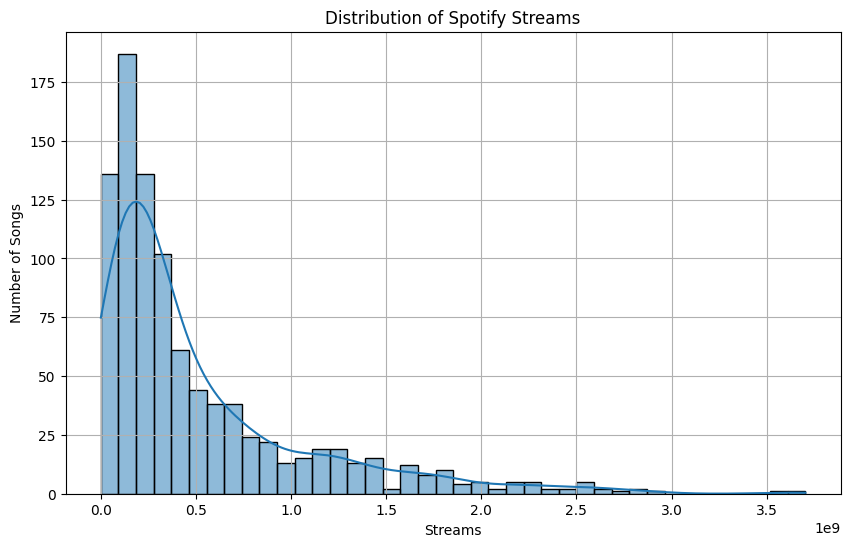

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df['streams'], kde=True, bins=40)
plt.title("Distribution of Spotify Streams")
plt.xlabel("Streams")
plt.ylabel("Number of Songs")
plt.grid(True)
plt.show()

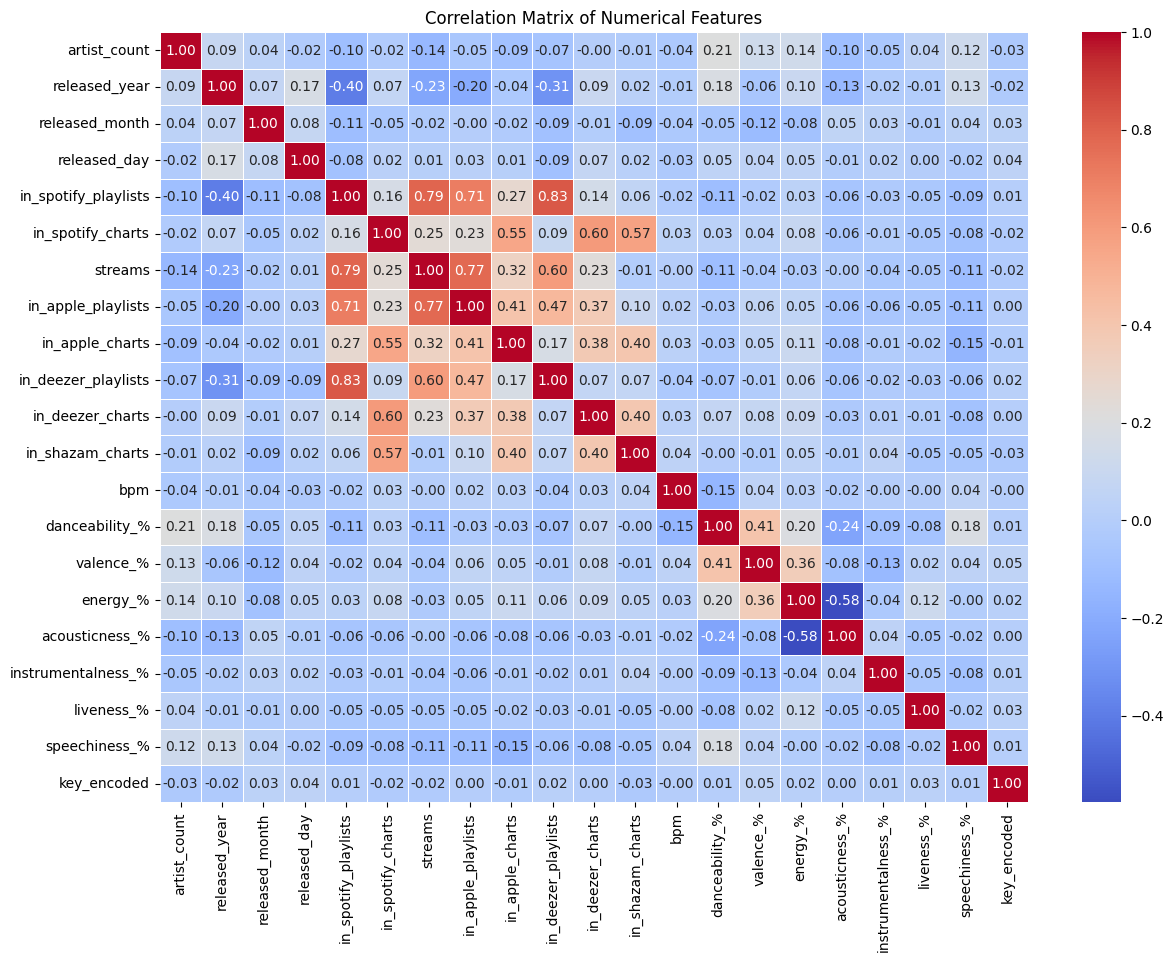

In [ ]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features")
plt.show()

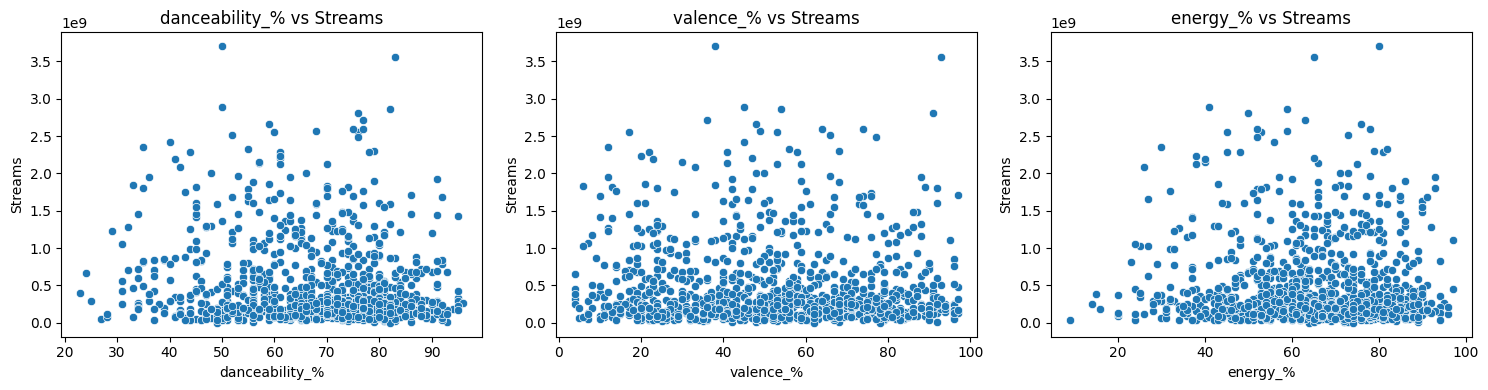

In [ ]:
features_to_plot = ['danceability_%', 'valence_%', 'energy_%']
plt.figure(figsize=(15,4))
for i, feature in enumerate(features_to_plot):
    plt.subplot(1, 3, i+1)
    sns.scatterplot(data=df, x=feature, y='streams')
    plt.title(f"{feature} vs Streams")
    plt.xlabel(feature)
    plt.ylabel("Streams")
plt.tight_layout()
plt.show()

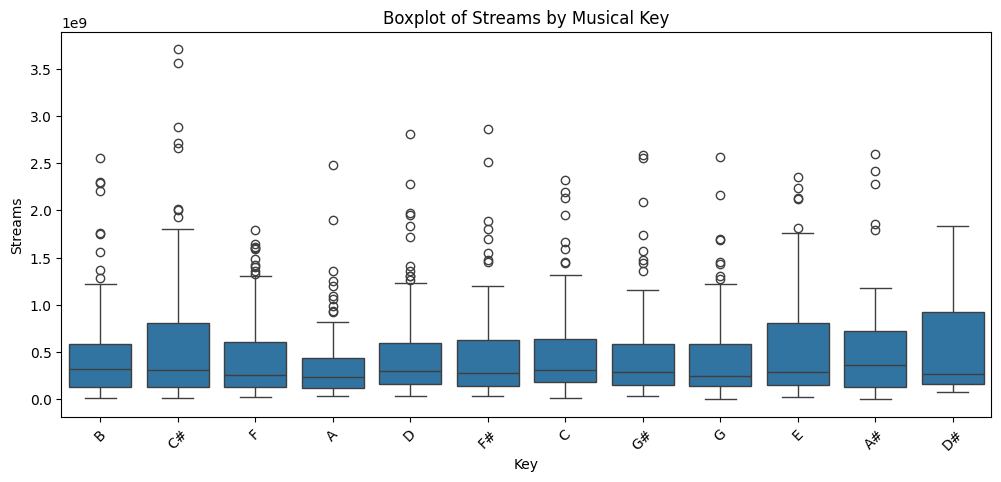

In [ ]:
plt.figure(figsize=(12,5))
sns.boxplot(data=df, x='key', y='streams')
plt.title("Boxplot of Streams by Musical Key")
plt.xlabel("Key")
plt.ylabel("Streams")
plt.xticks(rotation=45)
plt.show()

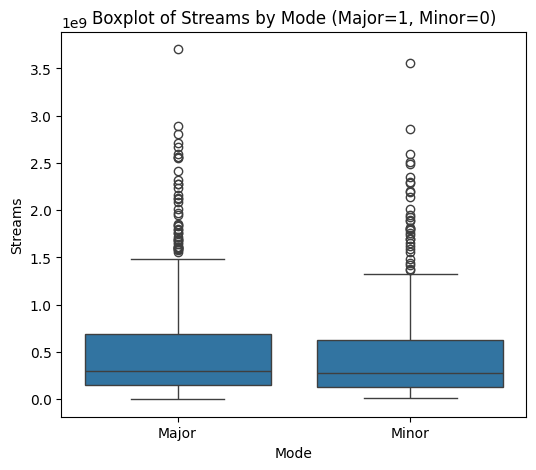

In [ ]:
plt.figure(figsize=(6,5))
sns.boxplot(data=df, x='mode', y='streams')
plt.title("Boxplot of Streams by Mode (Major=1, Minor=0)")
plt.xlabel("Mode")
plt.ylabel("Streams")
plt.show()

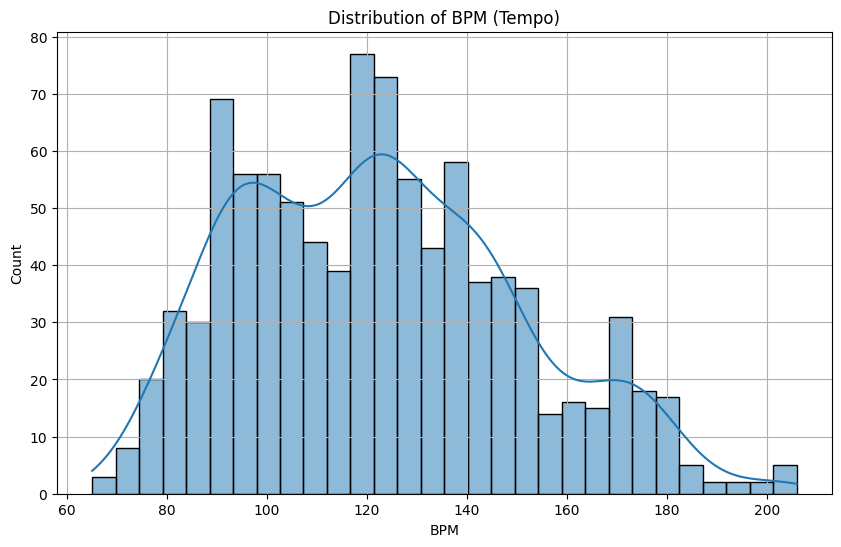

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df['bpm'], bins=30, kde=True)
plt.title("Distribution of BPM (Tempo)")
plt.xlabel("BPM")
plt.grid(True)
plt.show()

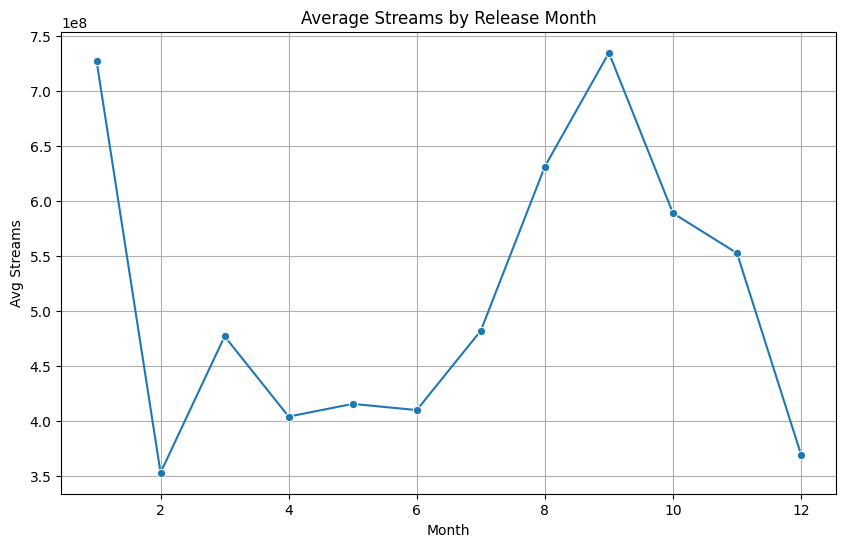

In [ ]:
monthly_avg = df.groupby("released_month")["streams"].mean().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(data=monthly_avg, x="released_month", y="streams", marker='o')
plt.title("Average Streams by Release Month")
plt.xlabel("Month")
plt.ylabel("Avg Streams")
plt.grid(True)
plt.show()

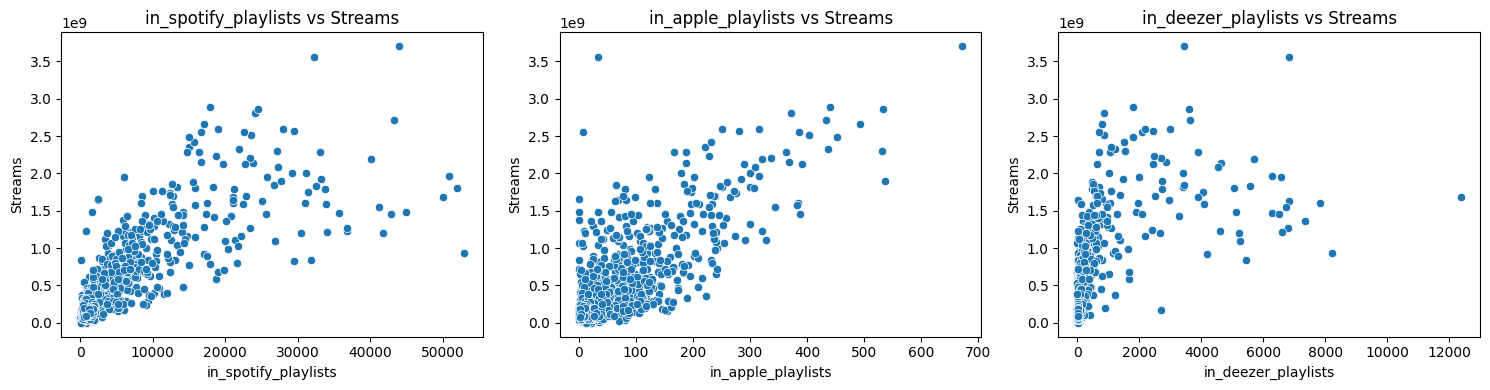

In [ ]:
platform_features = ['in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists']
plt.figure(figsize=(15,4))
for i, feature in enumerate(platform_features):
    plt.subplot(1, 3, i+1)
    sns.scatterplot(data=df, x=feature, y='streams')
    plt.title(f"{feature} vs Streams")
    plt.xlabel(feature)
    plt.ylabel("Streams")
plt.tight_layout()
plt.show()

In [ ]:
X = model_train_df.drop('streams', axis=1)
y = model_train_df['streams']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
def train_and_evaluate(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    print(f"Model: {model.__class__.__name__}")
    print(f"MAE : {mae:.2f}")
    print(f"MSE : {mse:.2f}")
    print(f"R²  : {r2:.2f}")
    print("-" * 30)

    return {
        "model": model.__class__.__name__,
        "MAE": mae,
        "MSE": mse,
        "R2": r2,
        "model_object": model,
        "predictions": predictions
    }


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Convert 'mode' column to numerical using Label Encoding
le_mode = LabelEncoder()
model_train_df['mode_encoded'] = le_mode.fit_transform(model_train_df['mode'])

# Drop the original 'mode' column as it's no longer needed for the model
model_train_df = model_train_df.drop(columns=['mode'])

# Split data into features (X) and target (y)
X = model_train_df.drop('streams', axis=1)
y = model_train_df['streams']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

models_before_transform = [
    LinearRegression(),
    RandomForestRegressor(random_state=42)
]

results = []

for model in models_before_transform:
    result = train_and_evaluate(model, X_train, y_train, X_test, y_test)
    results.append(result)

Model: LinearRegression
MAE : 186665575.46
MSE : 70164083509558992.00
R²  : 0.71
------------------------------
Model: RandomForestRegressor
MAE : 133324749.03
MSE : 42475762948033040.00
R²  : 0.83
------------------------------


In [ ]:
def evaluate_model_cv(model, X, y, cv=5):
    scores = cross_validate(model, X, y, cv=cv,
                            scoring=('r2', 'neg_mean_absolute_error', 'neg_mean_squared_error'),
                            return_train_score=False)

    print(f"Model: {model.__class__.__name__}")
    print(f"Mean R² : {scores['test_r2'].mean():.2f}")
    print(f"Mean MAE: {-scores['test_neg_mean_absolute_error'].mean():.2f}")
    print(f"Mean MSE: {-scores['test_neg_mean_squared_error'].mean():.2f}")
    print("-" * 30)

In [ ]:
lin_reg = LinearRegression()
rf_reg = RandomForestRegressor(random_state=42)


evaluate_model_cv(lin_reg, X, y)
evaluate_model_cv(rf_reg, X, y)

Model: LinearRegression
Mean R² : 0.58
Mean MAE: 211822873.16
Mean MSE: 103002216302621728.00
------------------------------
Model: RandomForestRegressor
Mean R² : 0.72
Mean MAE: 166618704.75
Mean MSE: 69100031213419992.00
------------------------------


In [ ]:
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

In [ ]:
xgb_results = train_and_evaluate(xgb_model, X_train, y_train, X_test, y_test)

Model: XGBRegressor
MAE : 136628368.00
MSE : 44417525278048256.00
R²  : 0.82
------------------------------


In [ ]:
evaluate_model_cv(xgb_model, X_train, y_train)

Model: XGBRegressor
Mean R² : 0.80
Mean MAE: 150200089.60
Mean MSE: 64539694449924504.00
------------------------------


In [ ]:
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

In [ ]:
y_train_log.head()

,streams
318,18.866742
545,20.212057
557,18.505105
109,20.874802
77,20.930829


In [ ]:
models_after_transform = [
    LinearRegression(),
    RandomForestRegressor(random_state=42),
    XGBRegressor(random_state=42, verbosity=0)
]

log_model_results = []
for model in models_after_transform:
    result = train_and_evaluate(model, X_train, y_train_log, X_test, y_test_log)
    log_model_results.append(result)

Model: LinearRegression
MAE : 0.55
MSE : 0.49
R²  : 0.52
------------------------------
Model: RandomForestRegressor
MAE : 0.36
MSE : 0.22
R²  : 0.78
------------------------------
Model: XGBRegressor
MAE : 0.37
MSE : 0.23
R²  : 0.77
------------------------------


In [ ]:
for model in models_after_transform:
    evaluate_model_cv(model, X_train, y_train_log)


Model: LinearRegression
Mean R² : 0.46
Mean MAE: 0.61
Mean MSE: 0.77
------------------------------
Model: RandomForestRegressor
Mean R² : 0.72
Mean MAE: 0.36
Mean MSE: 0.42
------------------------------
Model: XGBRegressor
Mean R² : 0.67
Mean MAE: 0.37
Mean MSE: 0.48
------------------------------


In [ ]:
def plot_feature_importance(model, X_train, top_n=10):
    importances = model.feature_importances_
    feature_names = X_train.columns
    feat_imp_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    }).sort_values(by="Importance", ascending=False).head(top_n)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')
    plt.title(f"Top {top_n} Feature Importances - {model.__class__.__name__}")
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.tight_layout()
    plt.show()

/tmp/ipython-input-84476977.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')


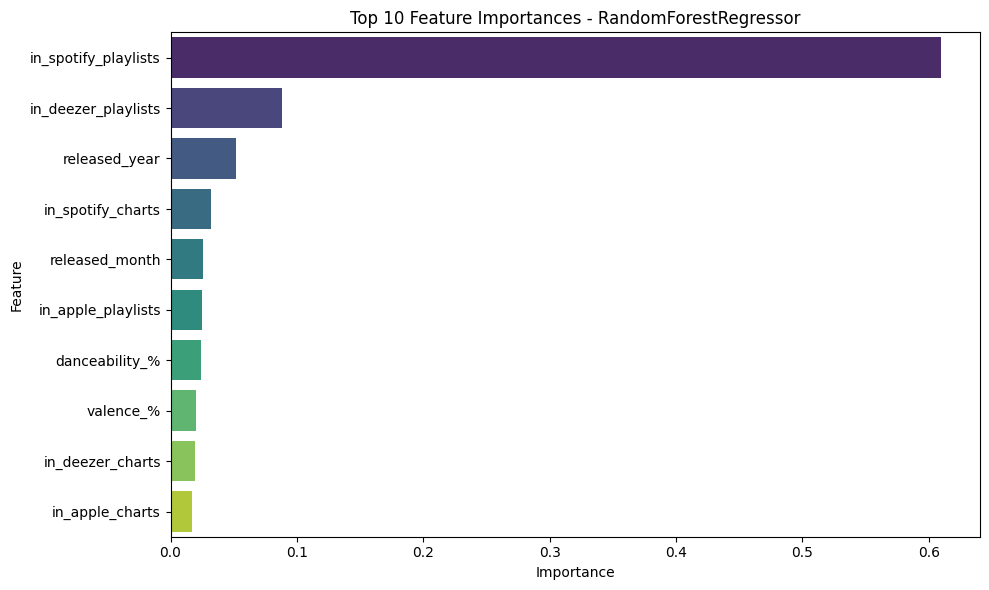

In [ ]:
plot_feature_importance(models_after_transform[1], X_train)

/tmp/ipython-input-84476977.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')


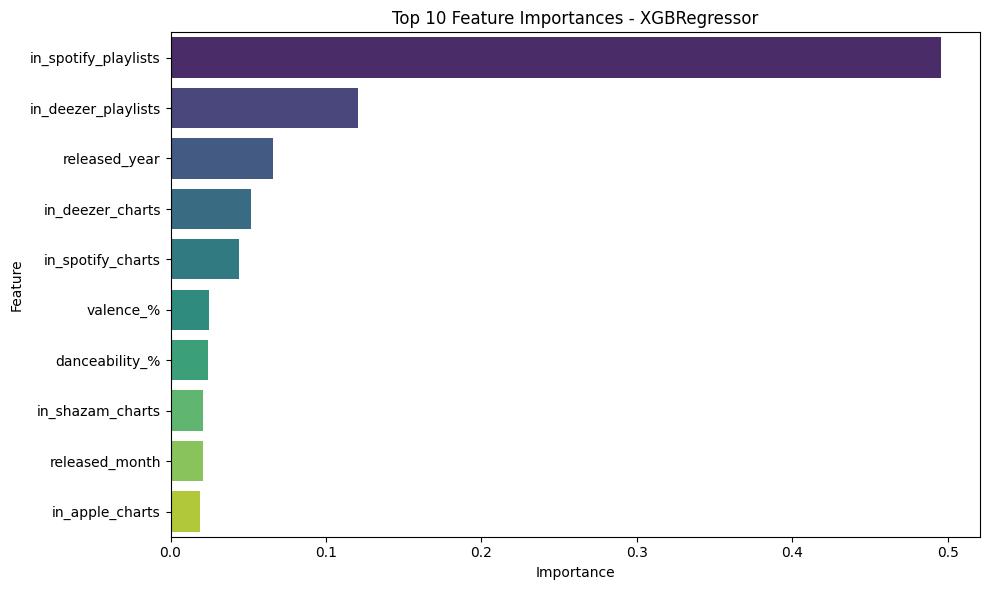

In [ ]:
plot_feature_importance(models_after_transform[2], X_train)  # XGBoost